In [1]:
import pandas as pd
import requests
import zipfile
import io
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../Data/ny_od_main_JT00_2019.csv.gz')
df

w_geocode        h_geocode  S000  SA01  SA02  SA03  SE01  SE02  \
0        360010001001004  360010002004006     1     1     0     0     0     0   
1        360010001001004  360930320001020     1     0     1     0     0     0   
2        360010001001005  360010002003009     1     1     0     0     0     0   
3        360010001001005  360010007003002     1     0     1     0     0     0   
4        360010001001005  360010021002003     1     0     0     1     0     0   
...                  ...              ...   ...   ...   ...   ...   ...   ...   
7836552  361231505004020  361231505003007     1     0     1     0     0     1   
7836553  361231505004020  361231505003010     1     0     1     0     0     0   
7836554  361231505004020  361231505003016     1     0     0     1     0     1   
7836555  361231505004023  360550113012014     1     0     0     1     0     0   
7836556  361231505004023  360894926004120     1     0     0     1     0     0   

         SE03  SI01  SI02  SI03  createdate  
0           1     0     0     1    20211018  
1           1     0     0     1    20211018  
2           1     1     0     0    20211018  
3           1     1     0     0    20211018  
4           1     0     1     0    20211018  
...       ...   ...   ...   ...         ...  
7836552     0     0     1     0    20211018  
7836553     1     0     1     0    20211018  
7836554     0     0     1     0    20211018  
7836555     1     0     0     1    20211018  
7836556     1     0     0     1    20211018  

[7836557 rows x 13 columns]

In [3]:
df['h_geocode_ct']=df.h_geocode.astype(str).str[:-4].astype(int) #aggregate from CBG to Census tract
df['w_geocode_ct']=df.w_geocode.astype(str).str[:-4].astype(int)
OD_df=df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum().unstack()
OD_df.columns=OD_df.columns.droplevel(0)
OD_df=OD_df.fillna(0)
OD_df

w_geocode_ct  36001000100  36001000200  36001000300  36001000401  36001000403  \
h_geocode_ct                                                                    
36001000100          17.0         26.0         31.0         21.0         13.0   
36001000200          19.0         77.0         77.0         58.0         26.0   
36001000300           9.0         26.0        117.0         70.0         55.0   
36001000401           2.0         16.0         24.0         41.0         45.0   
36001000403           8.0         23.0         57.0         64.0        114.0   
...                   ...          ...          ...          ...          ...   
36123150100           0.0          0.0          0.0          0.0          1.0   
36123150200           0.0          0.0          1.0          0.0          0.0   
36123150300           0.0          0.0          0.0          1.0          1.0   
36123150400           0.0          0.0          0.0          0.0          1.0   
36123150500           0.0          1.0          0.0          0.0          0.0   

w_geocode_ct  36001000404  36001000501  36001000502  36001000600  36001000700  \
h_geocode_ct                                                                    
36001000100           0.0          3.0          7.0          7.0          8.0   
36001000200           0.0         18.0          8.0          8.0         29.0   
36001000300           7.0         12.0         19.0         13.0         54.0   
36001000401           7.0          3.0          5.0          1.0          6.0   
36001000403           8.0         20.0         14.0         17.0         13.0   
...                   ...          ...          ...          ...          ...   
36123150100           0.0          0.0          0.0          0.0          0.0   
36123150200           0.0          0.0          0.0          0.0          0.0   
36123150300           0.0          0.0          0.0          0.0          0.0   
36123150400           0.0          0.0          0.0          0.0          0.0   
36123150500           0.0          0.0          0.0          0.0          0.0   

w_geocode_ct  ...  36121970700  36121970800  36121970900  36121971000  \
h_geocode_ct  ...                                                       
36001000100   ...          0.0          0.0          0.0          0.0   
36001000200   ...          0.0          0.0          0.0          0.0   
36001000300   ...          0.0          0.0          0.0          1.0   
36001000401   ...          0.0          0.0          0.0          0.0   
36001000403   ...          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
36123150100   ...          0.0          0.0          1.0          7.0   
36123150200   ...          0.0          0.0          0.0         10.0   
36123150300   ...          1.0          0.0          0.0          8.0   
36123150400   ...          2.0          0.0          1.0          4.0   
36123150500   ...          0.0          0.0          0.0          2.0   

w_geocode_ct  36121971100  36123150100  36123150200  36123150300  36123150400  \
h_geocode_ct                                                                    
36001000100           0.0          0.0          0.0          0.0          0.0   
36001000200           0.0          0.0          0.0          0.0          0.0   
36001000300           0.0          0.0          0.0          0.0          1.0   
36001000401           0.0          0.0          0.0          0.0          0.0   
36001000403           0.0          0.0          0.0          0.0          0.0   
...                   ...          ...          ...          ...          ...   
36123150100           0.0        423.0        190.0          8.0         47.0   
36123150200           0.0        128.0        505.0         42.0        197.0   
36123150300           0.0         25.0        144.0        157.0         54.0   
36123150400           0.0         55.0        251.0

In [4]:
# OD_df.to_csv('../Data/OD_alljobs.csv') #dataframe of O-D commutes

In [5]:
CBD_df=df[['w_geocode_ct','S000']].groupby(['w_geocode_ct']).sum()
CBD_df.head() #of people who commute to each census tract

S000
w_geocode_ct       
36001000100    1452
36001000200    3064
36001000300   11220
36001000401    9036
36001000403   10752

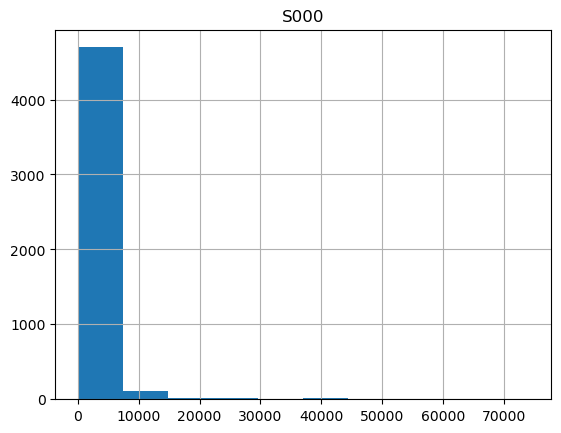

In [6]:
CBD_df.hist(); #histogram of total # of jobs

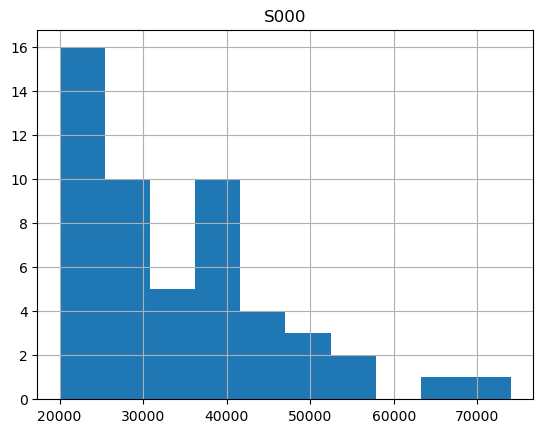

In [7]:
CBD_df[CBD_df['S000']>20000].hist(); # hist zoomed in to CTs with over 20,000 jobs

In [8]:
# url = 'http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_36_tract_500k.zip'
# local_path = 'geo_files/'
# print('Downloading shapefile...')
# r = requests.get(url)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# print("Done")
# z.extractall(path=local_path) # extract to folder
# filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 

# dbf, prj, shp, shx = [filename for filename in filenames]

county = gpd.read_file('../Data/geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))

nyc_CT=county[county.NAMELSADCO.isin(['Bronx County','Kings County', 'Queens County','New York County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)
nyc_CT.GEOID=nyc_CT.GEOID.astype(int)

Shape of the dataframe: (5394, 14)
Projection of dataframe: epsg:4269


/var/folders/9f/7xdrpjw15kn4wccwzb5xhr0m0000gn/T/ipykernel_47827/1249205793.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
/Users/lizjohnson/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/lizjohnson/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [9]:
nyc_cbd=CBD_df.merge(nyc_CT,how='right',left_on='w_geocode_ct',right_on='GEOID') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['ALAND'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='geometry')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3520137.0


In [10]:
nyc_cbd.head()

S000 STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID  \
1899  74028.0      36      061  010900  1400000US36061010900  36061010900   
1012  67041.0      36      047  001100  1400000US36047001100  36047001100   
117   52535.0      36      061  011900  1400000US36061011900  36061011900   
1785  51265.0      36      061  010100  1400000US36061010100  36061010100   
572   41809.0      36      061  009400  1400000US36061009400  36061009400   

     NAME          NAMELSAD STUSPS       NAMELSADCO STATE_NAME LSAD   ALAND  \
1899  109  Census Tract 109     NY  New York County   New York   CT  175741   
1012   11   Census Tract 11     NY     Kings County   New York   CT  168507   
117   119  Census Tract 119     NY  New York County   New York   CT  177591   
1785  101  Census Tract 101     NY  New York County   New York   CT  175520   
572    94   Census Tract 94     NY  New York County   New York   CT  152754   

      AWATER                                           geometry  \
1899       0  POLYGON ((-73.99298 40.75285, -73.99253 40.753...   
1012       0  POLYGON ((-73.99045 40.69373, -73.99066 40.694...   
117        0  POLYGON ((-73.98930 40.75791, -73.98884 40.758...   
1785       0  POLYGON ((-73.99484 40.75029, -73.99395 40.751...   
572        0  POLYGON ((-73.98040 40.75415, -73.97994 40.754...   

                        centroid  S000_area_norm  
1899  POINT (-73.98970 40.75225)        0.421234  
1012  POINT (-73.98771 40.69329)        0.397853  
117   POINT (-73.98602 40.75732)        0.295820  
1785  POINT (-73.99154 40.74973)        0.292075  
572   POINT (-73.97775 40.75523)        0.273702

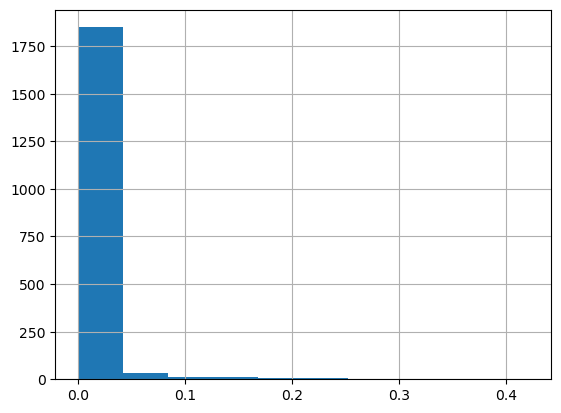

In [11]:
nyc_cbd['S000_area_norm'].hist();

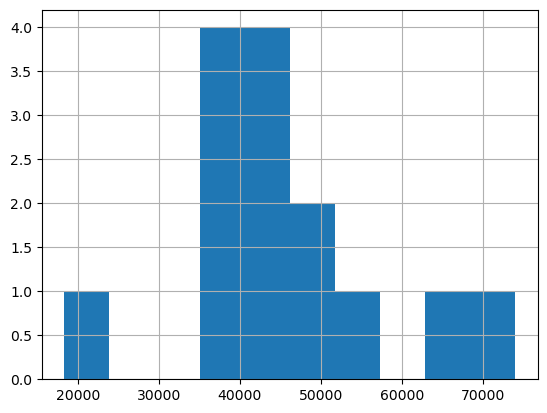

In [12]:
nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].hist();

In [13]:
#five CBDs
jobs_in_cbd=nyc_cbd.head(n=5)['S000'].sum()
print('Percent of Jobs in 5 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 5 CBDS 8.143944397618617 %


In [14]:
#10 CBDs
jobs_in_cbd=nyc_cbd.head(n=10)['S000'].sum()
print('Percent of Jobs in 10 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 10 CBDS 13.636202227356492 %


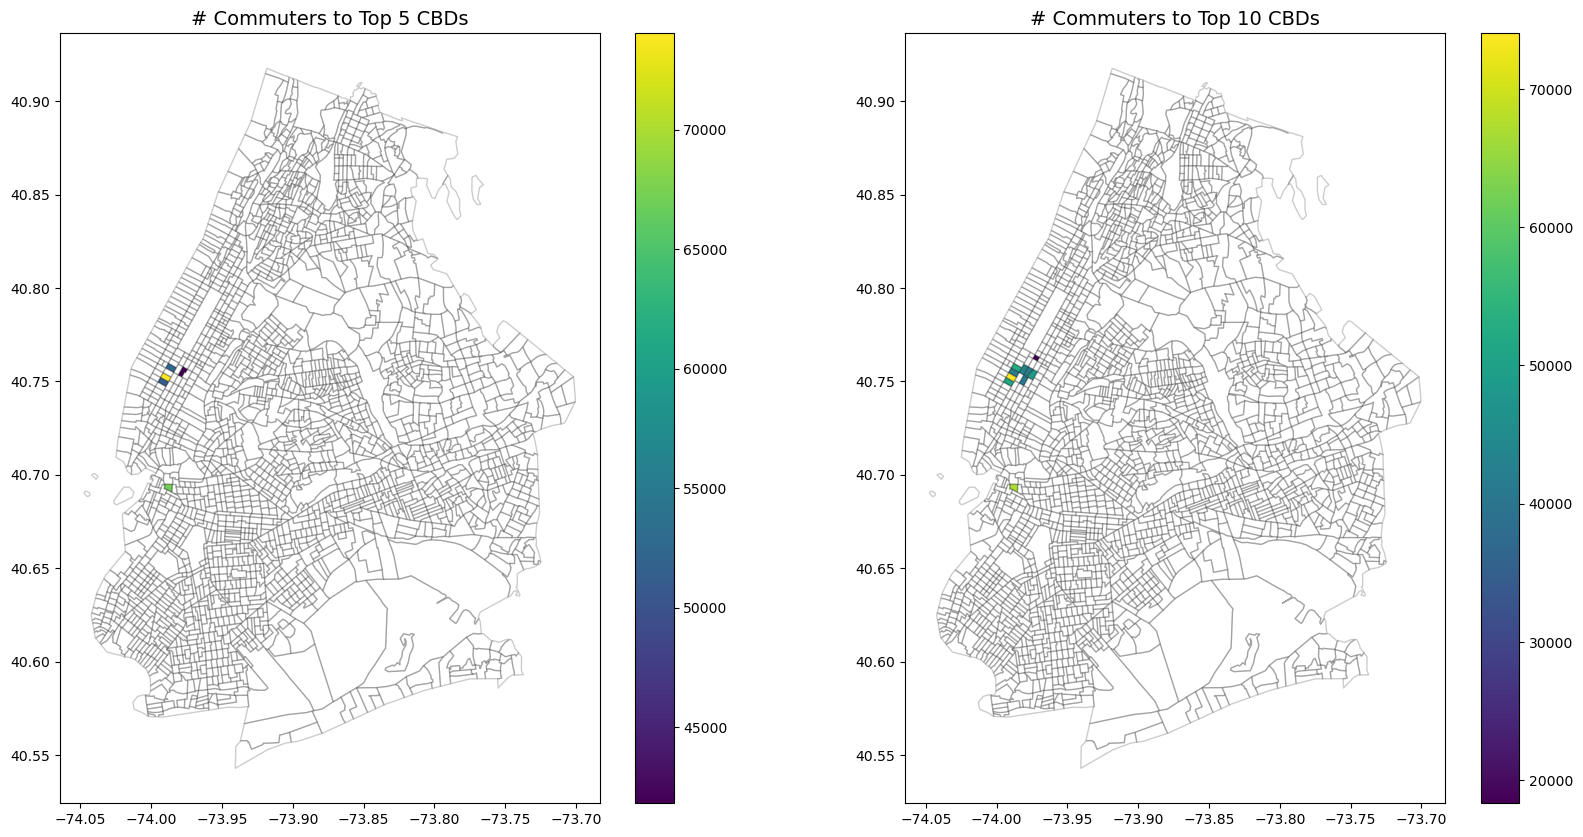

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd.head(n=5).plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd.head(n=10).plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('# Commuters to Top 5 CBDs',fontsize=14);
ax2.set_title('# Commuters to Top 10 CBDs',fontsize=14);

In [16]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with over 15,000 jobs',nyc_cbd[nyc_cbd['S000']>15000]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with over 15,000 jobs 40.502202044977224 %


In [17]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with density > 0.2 jobs/m^2 ',nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with density > 0.2 jobs/m^2  18.029980083161536 %


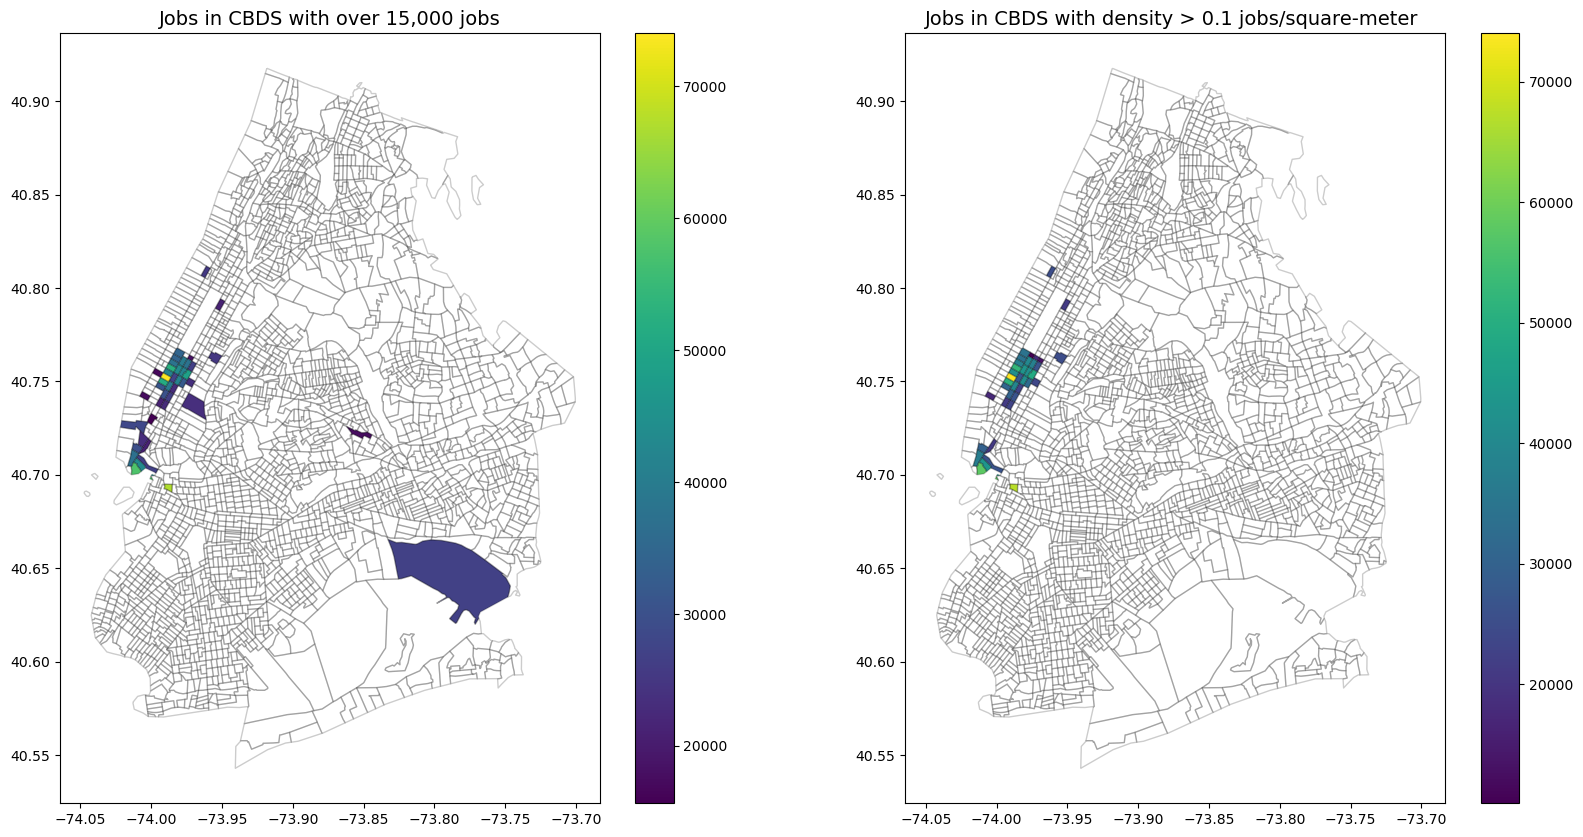

In [18]:


fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd[nyc_cbd['S000']>15000].plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd[nyc_cbd['S000_area_norm']>0.1].plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('Jobs in CBDS with over 15,000 jobs',fontsize=14);
ax2.set_title('Jobs in CBDS with density > 0.1 jobs/square-meter ',fontsize=14);

In [19]:
#nyc_cbd[['GEOID','S000','geometry', 'centroid']].head(n=10).to_csv('Top_10_CBDs.csv')

<AxesSubplot:>

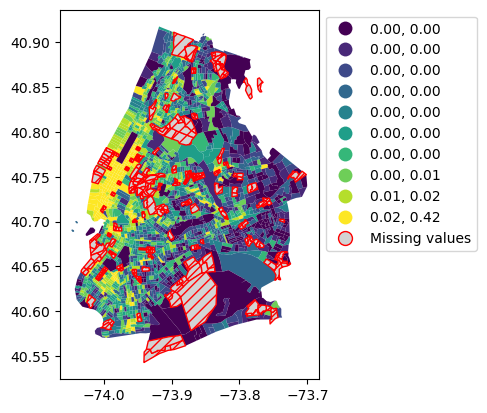

In [21]:
nyc_cbd.plot(column = 'S000_area_norm',k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})

<AxesSubplot:>

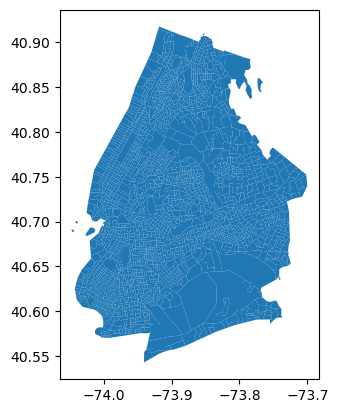

In [22]:
nyc_CT.plot()

<AxesSubplot:>

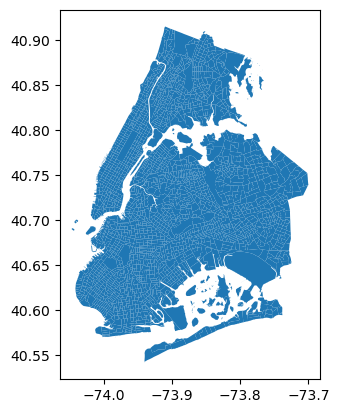

In [139]:
from shapely.wkt import loads

nyc_tracts = pd.read_csv('../Data/2020_Census_Tracts_-_Tabular.csv')
# Convert the 'the_geom' column from WKT format to Shapely geometry objects
nyc_tracts['the_geom'] = nyc_tracts['the_geom'].apply(loads)
#remove staten island
nyc_tracts = nyc_tracts[nyc_tracts['BoroName'] != 'Staten Island']

# Convert the pandas DataFrame to a GeoDataFrame
tracts_gdf = gpd.GeoDataFrame(nyc_tracts, geometry='the_geom', crs = '4326')
tracts_gdf.plot()

In [140]:
tracts_gdf.head()

the_geom  CTLabel  BoroCode  \
0  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...     1.00         1   
1  MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...     2.01         1   
2  MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...     6.00         1   
3  MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...    14.01         1   
4  MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...    14.02         1   

    BoroName  CT2020  BoroCT2020  CDEligibil  \
0  Manhattan     100     1000100         NaN   
1  Manhattan     201     1000201         NaN   
2  Manhattan     600     1000600         NaN   
3  Manhattan    1401     1001401         NaN   
4  Manhattan    1402     1001402         NaN   

                                             NTAName NTA2020 CDTA2020  \
0  The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01   
1                              Chinatown-Two Bridges  MN0301     MN03   
2                              Chinatown-Two Bridges  MN0301     MN03   
3                                    Lower East Side  MN0302     MN03   
4                                    Lower East Side  MN0302     MN03   

                                            CDTANAME        GEOID  \
0  MN01 Financial District-Tribeca (CD 1 Equivalent)  36061000100   
1   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   
2   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000600   
3   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061001401   
4   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061001402   

     Shape_Leng    Shape_Area  
0  11023.048501  1.844421e+06  
1   4754.495247  9.723121e+05  
2   6976.286456  2.582705e+06  
3   5075.332000  1.006117e+06  
4   4459.156019  1.226206e+06

In [141]:
tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [148]:
## adding Calie's code from above
# calculate centroids and extract Lat and Lon coordinates

tracts_gdf['centroid'] = tracts_gdf.centroid
tracts_gdf['Center_Lat'] = tracts_gdf['centroid'].y
tracts_gdf['Center_Lon'] = tracts_gdf['centroid'].x
tracts_gdf = tracts_gdf.drop(columns = 'centroid')
tracts_gdf.GEOID=tracts_gdf.GEOID.astype(int)
tracts_gdf = tracts_gdf.to_crs(32118)
tracts_gdf['area_km2'] = tracts_gdf.the_geom.area / 1e6
tracts_gdf.head()

/var/folders/9f/7xdrpjw15kn4wccwzb5xhr0m0000gn/T/ipykernel_47827/961024025.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts_gdf['centroid'] = tracts_gdf.centroid


the_geom  CTLabel  BoroCode  \
0  MULTIPOLYGON (((296291.109 58135.715, 296322.4...     1.00         1   
1  MULTIPOLYGON (((301310.087 60280.586, 301136.5...     2.01         1   
2  MULTIPOLYGON (((300826.356 60824.127, 300901.0...     6.00         1   
3  MULTIPOLYGON (((300982.972 61050.770, 301053.2...    14.01         1   
4  MULTIPOLYGON (((301261.149 61343.713, 301332.2...    14.02         1   

    BoroName  CT2020  BoroCT2020  CDEligibil  \
0  Manhattan     100     1000100         NaN   
1  Manhattan     201     1000201         NaN   
2  Manhattan     600     1000600         NaN   
3  Manhattan    1401     1001401         NaN   
4  Manhattan    1402     1001402         NaN   

                                             NTAName NTA2020 CDTA2020  \
0  The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01   
1                              Chinatown-Two Bridges  MN0301     MN03   
2                              Chinatown-Two Bridges  MN0301     MN03   
3                                    Lower East Side  MN0302     MN03   
4                                    Lower East Side  MN0302     MN03   

                                            CDTANAME        GEOID  \
0  MN01 Financial District-Tribeca (CD 1 Equivalent)  36061000100   
1   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   
2   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000600   
3   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061001401   
4   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061001402   

     Shape_Leng    Shape_Area  Center_Lat  Center_Lon  area_km2  
0  11023.048501  1.844421e+06   40.695677  -74.042338  0.171350  
1   4754.495247  9.723121e+05   40.711869  -73.985848  0.090331  
2   6976.286456  2.582705e+06   40.711951  -73.989477  0.239943  
3   5075.332000  1.006117e+06   40.715160  -73.987332  0.093472  
4   4459.156019  1.226206e+06   40.717513  -73.985882  0.113919

In [149]:
tracts_gdf = tracts_gdf.to_crs(4326)
tracts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [150]:
tracts_gdf.head()

the_geom  CTLabel  BoroCode  \
0  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...     1.00         1   
1  MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...     2.01         1   
2  MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...     6.00         1   
3  MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...    14.01         1   
4  MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...    14.02         1   

    BoroName  CT2020  BoroCT2020  CDEligibil  \
0  Manhattan     100     1000100         NaN   
1  Manhattan     201     1000201         NaN   
2  Manhattan     600     1000600         NaN   
3  Manhattan    1401     1001401         NaN   
4  Manhattan    1402     1001402         NaN   

                                             NTAName NTA2020 CDTA2020  \
0  The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01   
1                              Chinatown-Two Bridges  MN0301     MN03   
2                              Chinatown-Two Bridges  MN0301     MN03   
3                                    Lower East Side  MN0302     MN03   
4                                    Lower East Side  MN0302     MN03   

                                            CDTANAME        GEOID  \
0  MN01 Financial District-Tribeca (CD 1 Equivalent)  36061000100   
1   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   
2   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000600   
3   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061001401   
4   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061001402   

     Shape_Leng    Shape_Area  Center_Lat  Center_Lon  area_km2  
0  11023.048501  1.844421e+06   40.695677  -74.042338  0.171350  
1   4754.495247  9.723121e+05   40.711869  -73.985848  0.090331  
2   6976.286456  2.582705e+06   40.711951  -73.989477  0.239943  
3   5075.332000  1.006117e+06   40.715160  -73.987332  0.093472  
4   4459.156019  1.226206e+06   40.717513  -73.985882  0.113919

In [146]:
tracts_gdf.dtypes

the_geom      geometry
CTLabel        float64
BoroCode         int64
BoroName        object
CT2020           int64
BoroCT2020       int64
CDEligibil     float64
NTAName         object
NTA2020         object
CDTA2020        object
CDTANAME        object
GEOID            int64
Shape_Leng     float64
Shape_Area     float64
centroid      geometry
Center_Lat     float64
Center_Lon     float64
area_km2       float64
dtype: object

In [151]:
tracts_gdf.to_file('../Data/NYC_tracts.shp')

In [66]:
nyc_cbd=CBD_df.merge(tracts_gdf,how='right',left_on='w_geocode_ct',right_on='GEOID') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['area_km2'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='the_geom')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3520137.0


In [67]:
nyc_cbd.head()

S000                                           the_geom  CTLabel  \
67    74028.0  MULTIPOLYGON (((-73.98595 40.75232, -73.98640 ...    109.0   
1292  67041.0  MULTIPOLYGON (((-73.98514 40.69489, -73.98517 ...     11.0   
76    52535.0  MULTIPOLYGON (((-73.98226 40.75739, -73.98271 ...    119.0   
60    51265.0  MULTIPOLYGON (((-73.98777 40.74979, -73.98797 ...    101.0   
52    41809.0  MULTIPOLYGON (((-73.97444 40.75656, -73.97489 ...     94.0   

      BoroCode   BoroName  CT2020  BoroCT2020  CDEligibil  \
67           1  Manhattan   10900     1010900         NaN   
1292         3   Brooklyn    1100     3001100         NaN   
76           1  Manhattan   11900     1011900         NaN   
60           1  Manhattan   10100     1010100         NaN   
52           1  Manhattan    9400     1009400         NaN   

                                  NTAName NTA2020 CDTA2020  \
67                   Midtown-Times Square  MN0502     MN05   
1292  Downtown Brooklyn-DUMBO-Boerum Hill  BK0202     BK02   
76                   Midtown-Times Square  MN0502     MN05   
60    Midtown South-Flatiron-Union Square  MN0501     MN05   
52                   Midtown-Times Square  MN0502     MN05   

                                               CDTANAME        GEOID  \
67    MN05 Midtown-Flatiron-Union Square (CD 5 Appro...  36061010900   
1292  BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...  36047001100   
76    MN05 Midtown-Flatiron-Union Square (CD 5 Appro...  36061011900   
60    MN05 Midtown-Flatiron-Union Square (CD 5 Appro...  36061010100   
52    MN05 Midtown-Flatiron-Union Square (CD 5 Appro...  36061009400   

       Shape_Leng    Shape_Area                    centroid  Center_Lat  \
67    5703.531525  1.891365e+06  POINT (-73.98970 40.75225)   40.752251   
1292  5758.212823  1.811206e+06  POINT (-73.98770 40.69329)   40.693289   
76    5722.090729  1.911311e+06  POINT (-73.98602 40.75732)   40.757315   
60    5701.715932  1.891378e+06  POINT (-73.99154 40.74973)   40.749731   
52    5738.940074  1.646379e+06  POINT (-73.97774 40.75523)   40.755227   

      Center_Lon  area_km2  S000_area_norm  
67    -73.989703  0.175714   421297.703383  
1292  -73.987705  0.168268   398418.429095  
76    -73.986025  0.177567   295859.676934  
60    -73.991537  0.175716   291749.342635  
52    -73.977744  0.152954   273343.164989

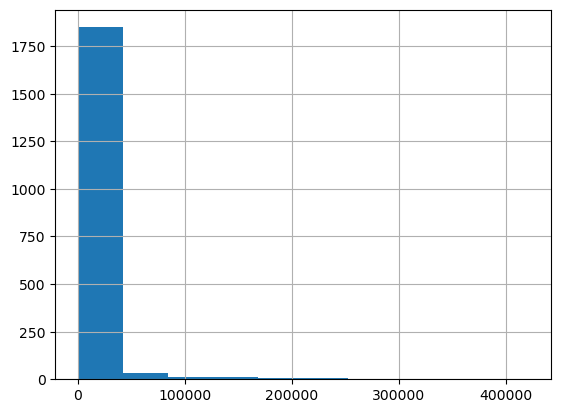

In [68]:
nyc_cbd['S000_area_norm'].hist();

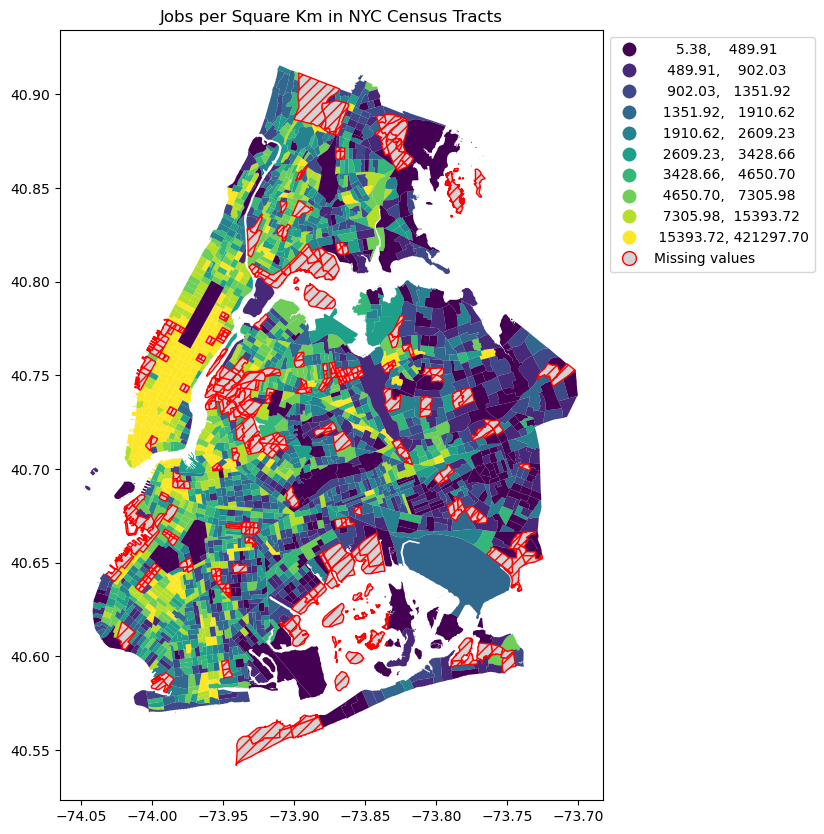

In [73]:
fig, ax = plt.subplots(figsize = (10,10))
nyc_cbd.plot(column = 'S000_area_norm',ax = ax, k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})
plt.title('Jobs per Square Km in NYC Census Tracts')
plt.show()

In [76]:
# find top 10 percent
# Calculate the 90th percentile of the jobs_per_km column
jobs_per_km_threshold = nyc_cbd["S000_area_norm"].quantile(0.99)
print(jobs_per_km_threshold)
# # Create a new DataFrame with only the rows where jobs_per_km is in the top 10%
# top10_nyc_cbd = nyc_cbd[nyc_cbd["jobs_per_km"] >= jobs_per_km_threshold]

173294.27723564353


In [77]:
len(nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold])

20

In [78]:
#percent of total jobs
nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold]['S000'].sum()/nyc_cbd['S000'].sum()

0.24539868760789707

In [80]:
quant_thresh = pd.DataFrame(columns = ['Quantile', 'Jobs Threshold','Tracts', '% Total Jobs'])
quantiles = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

for quantile in quantiles:
    jobs_per_km_threshold = nyc_cbd["S000_area_norm"].quantile(quantile)
    tract_count = len(nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold])
    perc_tot = nyc_cbd[nyc_cbd["S000_area_norm"] >= jobs_per_km_threshold]['S000'].sum()/nyc_cbd['S000'].sum()
    
    # Append the results to the quant_thresh DataFrame
    quant_thresh.loc[len(quant_thresh)] = [quantile, jobs_per_km_threshold, tract_count, perc_tot]
quant_thresh

Quantile  Jobs Threshold  Tracts  % Total Jobs
0      0.75     5768.072973   482.0      0.790781
1      0.80     7305.983605   385.0      0.748030
2      0.85     9637.671045   289.0      0.708073
3      0.90    15393.717438   193.0      0.647600
4      0.95    33122.540328    97.0      0.536291
5      0.99   173294.277236    20.0      0.245399

In [88]:
Top1 = nyc_cbd[nyc_cbd["S000_area_norm"] >= nyc_cbd["S000_area_norm"].quantile(0.99)]

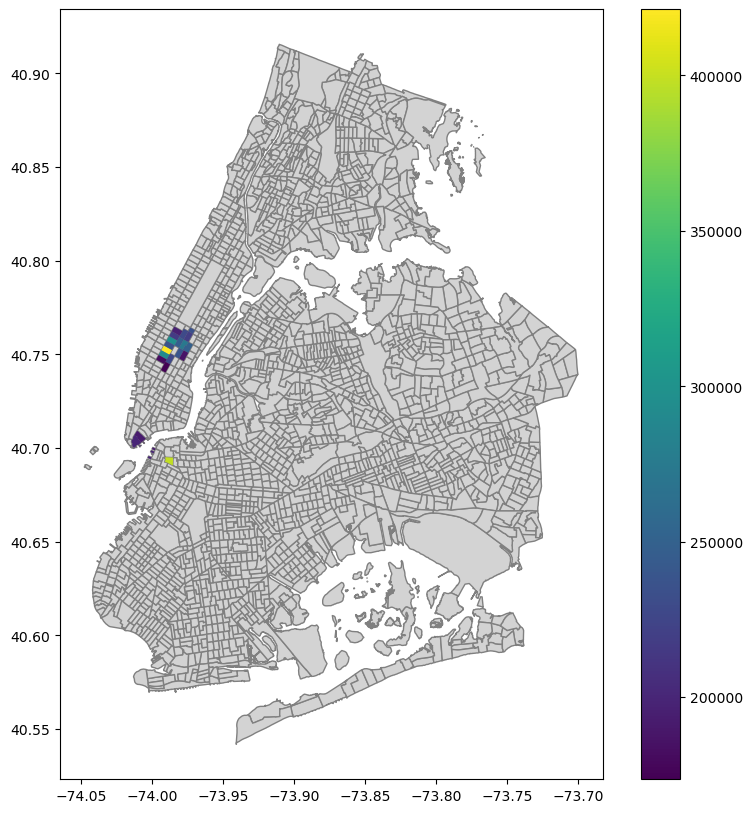

In [89]:
fig,ax = plt.subplots(figsize=(10,10)) #standardize scale!!
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'grey')
Top1.plot(ax = ax, column='S000_area_norm', legend=True)
plt.show()

In [99]:
#try new LEHD data source
LEHD = gpd.read_file('/Users/lizjohnson/Downloads/otm_aab0d71ba7d8441790c44b03a32c97dd/points_2019.shp')
LEHD.head()

id   c000  ca01   ca02  ca03  ce01  ce02  ce03  cns01  cns02  \
0  360050144006004   15.0   9.0    6.0   0.0  12.0   3.0   0.0    0.0    0.0   
1  360810473002006  228.0  56.0  116.0  56.0  65.0  82.0  81.0    0.0    0.0   
2  360810510001005    3.0   0.0    2.0   1.0   2.0   1.0   0.0    0.0    0.0   
3  360810528001012   13.0   2.0    7.0   4.0   4.0   2.0   7.0    0.0    0.0   
4  360050425006000   76.0  21.0   30.0  25.0  30.0  25.0  21.0    0.0    0.0   

   ...  cr07   ct01  ct02  cd01  cd02  cd03  cd04  cg01   cg02  \
0  ...   0.0    1.0  14.0   4.0   1.0   1.0   0.0  13.0    2.0   
1  ...   5.0  182.0  46.0  44.0  19.0  37.0  72.0  88.0  140.0   
2  ...   1.0    3.0   0.0   1.0   1.0   0.0   1.0   3.0    0.0   
3  ...   1.0   11.0   2.0   2.0   2.0   3.0   4.0   7.0    6.0   
4  ...   0.0   54.0  22.0   8.0  12.0  24.0  11.0  45.0   31.0   

                         geometry  
0  POINT (1838668.125 587697.312)  
1  POINT (1836180.125 577529.438)  
2  POINT (1846817.500 576940.812)  
3  POINT (1846873.375 574900.688)  
4  POINT (1832545.375 592322.625)  

[5 rows x 43 columns]

In [107]:
LEHD = LEHD.to_crs(4326)
tract_LEHD = gpd.sjoin(tracts_gdf,LEHD,how='left',predicate='contains') #merge LEHD data with tracts geodata
tract_LEHD.head()

the_geom  CTLabel  BoroCode  \
0  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...     1.00         1   
1  MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...     2.01         1   
1  MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...     2.01         1   
1  MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...     2.01         1   
1  MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...     2.01         1   

    BoroName  CT2020  BoroCT2020  CDEligibil  \
0  Manhattan     100     1000100         NaN   
1  Manhattan     201     1000201         NaN   
1  Manhattan     201     1000201         NaN   
1  Manhattan     201     1000201         NaN   
1  Manhattan     201     1000201         NaN   

                                             NTAName NTA2020 CDTA2020  ...  \
0  The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01  ...   
1                              Chinatown-Two Bridges  MN0301     MN03  ...   
1                              Chinatown-Two Bridges  MN0301     MN03  ...   
1                              Chinatown-Two Bridges  MN0301     MN03  ...   
1                              Chinatown-Two Bridges  MN0301     MN03  ...   

  cr05  cr07   ct01  ct02  cd01  cd02  cd03  cd04  cg01  cg02  
0  2.0   0.0  111.0  55.0  17.0  25.0  25.0  13.0  73.0  93.0  
1  0.0   2.0  112.0  27.0  11.0  37.0  23.0  48.0  59.0  80.0  
1  0.0   4.0   56.0  13.0   8.0   8.0  14.0  28.0  37.0  32.0  
1  0.0   4.0   41.0  10.0   5.0  13.0  12.0   9.0  40.0  11.0  
1  0.0   2.0   39.0  10.0   6.0  11.0  12.0  11.0  42.0   7.0  

[5 rows x 61 columns]

In [120]:
cl_ls = tracts_gdf.columns.tolist()+['c000']
print(cl_ls)
tract_LEHD = tract_LEHD[cl_ls[1:]]
tract_LEHD.head()

['the_geom', 'CTLabel', 'BoroCode', 'BoroName', 'CT2020', 'BoroCT2020', 'CDEligibil', 'NTAName', 'NTA2020', 'CDTA2020', 'CDTANAME', 'GEOID', 'Shape_Leng', 'Shape_Area', 'centroid', 'Center_Lat', 'Center_Lon', 'area_km2', 'c000']


CTLabel  BoroCode   BoroName  CT2020  BoroCT2020  CDEligibil  \
0     1.00         1  Manhattan     100     1000100         NaN   
1     2.01         1  Manhattan     201     1000201         NaN   
1     2.01         1  Manhattan     201     1000201         NaN   
1     2.01         1  Manhattan     201     1000201         NaN   
1     2.01         1  Manhattan     201     1000201         NaN   

                                             NTAName NTA2020 CDTA2020  \
0  The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01   
1                              Chinatown-Two Bridges  MN0301     MN03   
1                              Chinatown-Two Bridges  MN0301     MN03   
1                              Chinatown-Two Bridges  MN0301     MN03   
1                              Chinatown-Two Bridges  MN0301     MN03   

                                            CDTANAME        GEOID  \
0  MN01 Financial District-Tribeca (CD 1 Equivalent)  36061000100   
1   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   
1   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   
1   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   
1   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   

     Shape_Leng    Shape_Area                    centroid  Center_Lat  \
0  11023.048501  1.844421e+06  POINT (-74.04234 40.69568)   40.695677   
1   4754.495247  9.723121e+05  POINT (-73.98585 40.71187)   40.711869   
1   4754.495247  9.723121e+05  POINT (-73.98585 40.71187)   40.711869   
1   4754.495247  9.723121e+05  POINT (-73.98585 40.71187)   40.711869   
1   4754.495247  9.723121e+05  POINT (-73.98585 40.71187)   40.711869   

   Center_Lon  area_km2   c000  
0  -74.042338  0.171350  166.0  
1  -73.985848  0.090331  139.0  
1  -73.985848  0.090331   69.0  
1  -73.985848  0.090331   51.0  
1  -73.985848  0.090331   49.0

In [121]:
# df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum()
tract_c000_agg = tract_LEHD[['GEOID','c000']].groupby('GEOID').sum()
tract_c000_agg.head()

c000
GEOID              
36005000100     0.0
36005000200    65.0
36005000400   529.0
36005001600  1343.0
36005001901  1068.0

In [122]:
len(tract_c000_agg)

2199

In [123]:
tract_LEHD_final = tracts_gdf.merge(tract_c000_agg,on = 'GEOID', how = 'left')
tract_LEHD_final.head()

the_geom  CTLabel  BoroCode  \
0  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...     1.00         1   
1  MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...     2.01         1   
2  MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...     6.00         1   
3  MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...    14.01         1   
4  MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...    14.02         1   

    BoroName  CT2020  BoroCT2020  CDEligibil  \
0  Manhattan     100     1000100         NaN   
1  Manhattan     201     1000201         NaN   
2  Manhattan     600     1000600         NaN   
3  Manhattan    1401     1001401         NaN   
4  Manhattan    1402     1001402         NaN   

                                             NTAName NTA2020 CDTA2020  \
0  The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01   
1                              Chinatown-Two Bridges  MN0301     MN03   
2                              Chinatown-Two Bridges  MN0301     MN03   
3                                    Lower East Side  MN0302     MN03   
4                                    Lower East Side  MN0302     MN03   

                                            CDTANAME        GEOID  \
0  MN01 Financial District-Tribeca (CD 1 Equivalent)  36061000100   
1   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   
2   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000600   
3   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061001401   
4   MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061001402   

     Shape_Leng    Shape_Area                    centroid  Center_Lat  \
0  11023.048501  1.844421e+06  POINT (-74.04234 40.69568)   40.695677   
1   4754.495247  9.723121e+05  POINT (-73.98585 40.71187)   40.711869   
2   6976.286456  2.582705e+06  POINT (-73.98948 40.71195)   40.711951   
3   5075.332000  1.006117e+06  POINT (-73.98733 40.71516)   40.715160   
4   4459.156019  1.226206e+06  POINT (-73.98588 40.71751)   40.717513   

   Center_Lon  area_km2    c000  
0  -74.042338  0.171350   166.0  
1  -73.985848  0.090331   426.0  
2  -73.989477  0.239943  1837.0  
3  -73.987332  0.093472  1047.0  
4  -73.985882  0.113919   872.0

<AxesSubplot:>

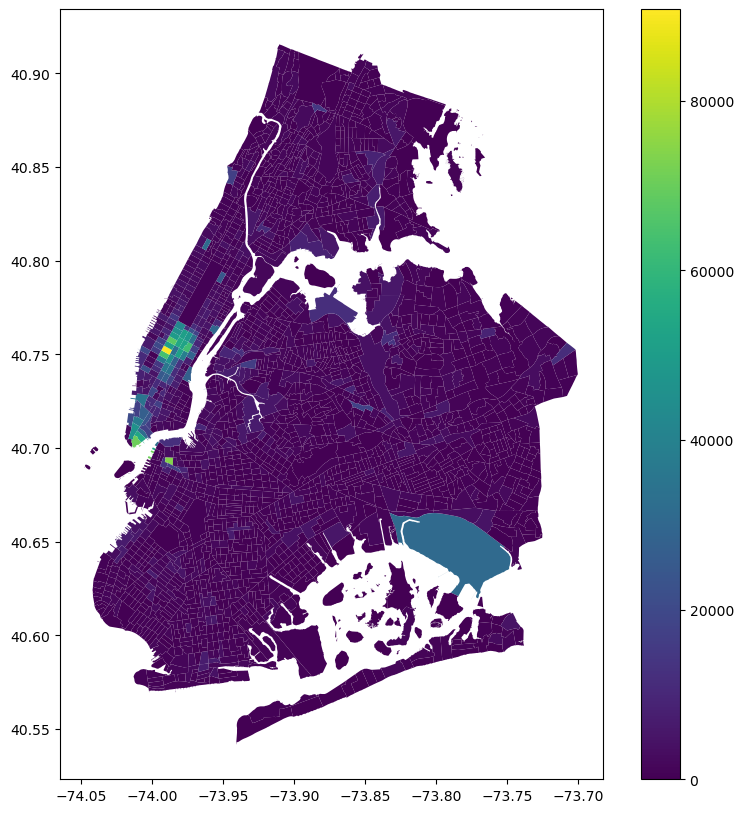

In [126]:
fig, ax = plt.subplots(figsize = (10,10))
tract_LEHD_final.plot(column = 'c000', ax = ax, legend = True)

In [127]:
tract_LEHD_final['Jobs_per_km2'] = tract_LEHD_final['c000'] / tract_LEHD_final['area_km2']
tract_LEHD_final.sort_values(by = 'Jobs_per_km2', ascending = False).head(20)

the_geom  CTLabel  BoroCode  \
67    MULTIPOLYGON (((-73.98595 40.75232, -73.98640 ...   109.00         1   
1292  MULTIPOLYGON (((-73.98514 40.69489, -73.98517 ...    11.00         3   
76    MULTIPOLYGON (((-73.98226 40.75739, -73.98271 ...   119.00         1   
60    MULTIPOLYGON (((-73.98777 40.74979, -73.98797 ...   101.00         1   
52    MULTIPOLYGON (((-73.97444 40.75656, -73.97489 ...    94.00         1   
50    MULTIPOLYGON (((-73.97122 40.75519, -73.97168 ...    92.00         1   
54    MULTIPOLYGON (((-73.97765 40.75791, -73.97812 ...    96.00         1   
44    MULTIPOLYGON (((-73.97835 40.75241, -73.97779 ...    82.00         1   
70    MULTIPOLYGON (((-73.96980 40.76291, -73.97026 ...   112.02         1   
63    MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ...   104.00         1   
72    MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ...   113.00         1   
81    MULTIPOLYGON (((-73.98043 40.75990, -73.98089 ...   125.00         1   
61    MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ...   102.00         1   
86    MULTIPOLYGON (((-73.97860 40.76240, -73.97906 ...   131.00         1   
39    MULTIPOLYGON (((-73.98408 40.74910, -73.98456 ...    76.00         1   
1167  MULTIPOLYGON (((-74.00078 40.69429, -74.00096 ...     9.00         1   
1166  MULTIPOLYGON (((-73.99800 40.69880, -73.99802 ...     7.00         1   
42    MULTIPOLYGON (((-73.97444 40.75076, -73.97493 ...    80.00         1   
71    MULTIPOLYGON (((-73.96658 40.76155, -73.96704 ...   112.03         1   
53    MULTIPOLYGON (((-73.98962 40.74728, -73.99007 ...    95.00         1   

       BoroName  CT2020  BoroCT2020  CDEligibil  \
67    Manhattan   10900     1010900         NaN   
1292   Brooklyn    1100     3001100         NaN   
76    Manhattan   11900     1011900         NaN   
60    Manhattan   10100     1010100         NaN   
52    Manhattan    9400     1009400         NaN   
50    Manhattan    9200     1009200         NaN   
54    Manhattan    9600     1009600         NaN   
44    Manhattan    8200     1008200         NaN   
70    Manhattan   11202     1011202         NaN   
63    Manhattan   10400     1010400         NaN   
72    Manhattan   11300     1011300         NaN   
81    Manhattan   12500     1012500         NaN   
61    Manhattan   10200     1010200         NaN   
86    Manhattan   13100     1013100         NaN   
39    Manhattan    7600     1007600         NaN   
1167  Manhattan     900     1000900         NaN   
1166  Manhattan     700     1000700         NaN   
42    Manhattan    8000     1008000         NaN   
71    Manhattan   11203     1011203         NaN   
53    Manhattan    9500     1009500         NaN   

                                   NTAName NTA2020 CDTA2020  \
67                    Midtown-Times Square  MN0502     MN05   
1292   Downtown Brooklyn-DUMBO-Boerum Hill  BK0202     BK02   
76                    Midtown-Times Square  MN0502     MN05   
60     Midtown South-Flatiron-Union Square  MN0501     MN05   
52                    Midtown-Times Square  MN0502     MN05   
50                 East Midtown-Turtle Bay  MN0604     MN06   
54                    Midtown-Times Square  MN0502     MN05   
44                    Midtown-Times Square  MN0502     MN05   
70                    Midtown-Times Square  MN0502     MN05   
63                    Midtown-Times Square  MN0502     MN05   
72                    Midtown-Times Square  MN0502     MN05   
81                    Midtown-Times Square  MN0502     MN05   
61                    Midtown-Times Square  MN0502     MN05   
86                    Midtown-Times Square  MN0502     MN05   
39     Midtown South-Flatiron-Union Square  MN0501     MN05   
1167  Financial District-Battery Park City  MN0101     MN01   
1166  Financial District-Battery Park City  MN0101     MN01   
42                    Murray Hill-Kips Bay  MN0603     MN06   
71                 East Midtown-Turtle Bay  MN0604     MN06   
53     Midtown South-Flatiron-Union Square  MN0501     MN05   

            

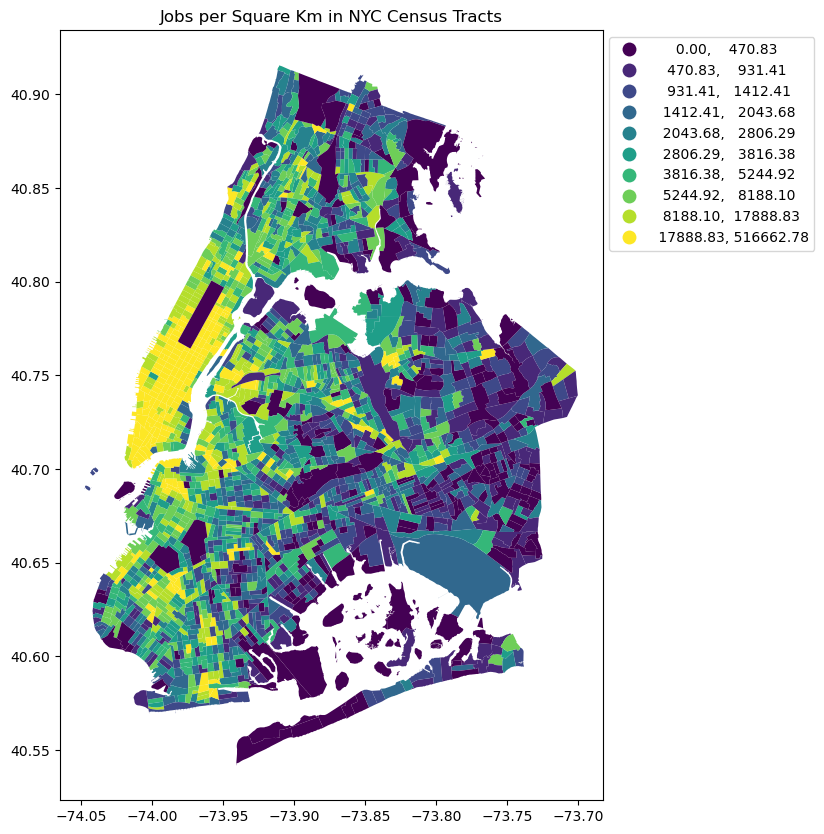

In [128]:
fig, ax = plt.subplots(figsize = (10,10))
tract_LEHD_final.plot(column = 'Jobs_per_km2',ax = ax, k=10, scheme='Quantiles', legend=True, 
                     missing_kwds={"color": "lightgrey", ## what to do with missing values
                                         "edgecolor": "red",
                                        "hatch": "///",
                                        "label": "Missing values",}
                     ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})
plt.title('Jobs per Square Km in NYC Census Tracts')
plt.show()

In [129]:
quant_thresh = pd.DataFrame(columns = ['Quantile', 'Jobs Threshold','Tracts', '% Total Jobs'])
quantiles = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99]

for quantile in quantiles:
    jobs_per_km_threshold = tract_LEHD_final['Jobs_per_km2'].quantile(quantile)
    tract_count = len(tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= jobs_per_km_threshold])
    perc_tot = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= jobs_per_km_threshold]['c000'].sum()/tract_LEHD_final['c000'].sum()
    
    # Append the results to the quant_thresh DataFrame
    quant_thresh.loc[len(quant_thresh)] = [quantile, jobs_per_km_threshold, tract_count, perc_tot]
quant_thresh

Quantile  Jobs Threshold  Tracts  % Total Jobs
0      0.75     6440.032774   550.0      0.791834
1      0.80     8188.103199   440.0      0.753922
2      0.85    10772.931267   330.0      0.709596
3      0.90    17888.830085   220.0      0.645328
4      0.95    37297.646062   110.0      0.541748
5      0.99   193628.180098    22.0      0.250314

In [135]:
Top1 = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= tract_LEHD_final['Jobs_per_km2'].quantile(0.99)]
Top5 = tract_LEHD_final[tract_LEHD_final['Jobs_per_km2'] >= tract_LEHD_final['Jobs_per_km2'].quantile(0.98)]

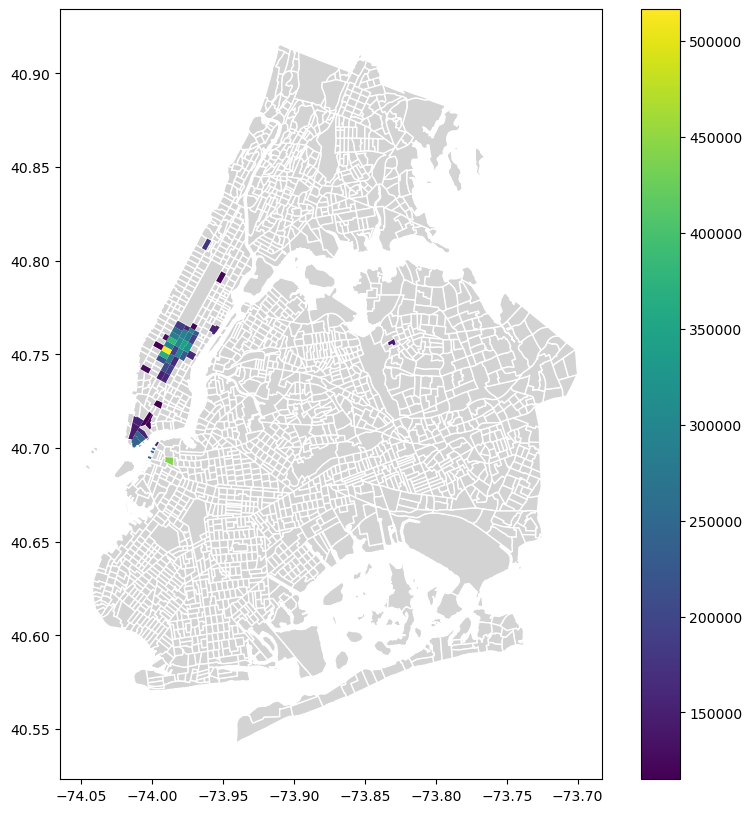

In [136]:
fig,ax = plt.subplots(figsize=(10,10)) #standardize scale!!
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'white')
Top5.plot(ax = ax, column='Jobs_per_km2', legend=True)
plt.show()

In [137]:
Top5.sort_values(by = 'Jobs_per_km2', ascending = False)

the_geom  CTLabel  BoroCode  \
67    MULTIPOLYGON (((-73.98595 40.75232, -73.98640 ...   109.00         1   
1292  MULTIPOLYGON (((-73.98514 40.69489, -73.98517 ...    11.00         3   
76    MULTIPOLYGON (((-73.98226 40.75739, -73.98271 ...   119.00         1   
60    MULTIPOLYGON (((-73.98777 40.74979, -73.98797 ...   101.00         1   
52    MULTIPOLYGON (((-73.97444 40.75656, -73.97489 ...    94.00         1   
50    MULTIPOLYGON (((-73.97122 40.75519, -73.97168 ...    92.00         1   
54    MULTIPOLYGON (((-73.97765 40.75791, -73.97812 ...    96.00         1   
44    MULTIPOLYGON (((-73.97835 40.75241, -73.97779 ...    82.00         1   
70    MULTIPOLYGON (((-73.96980 40.76291, -73.97026 ...   112.02         1   
63    MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ...   104.00         1   
72    MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ...   113.00         1   
81    MULTIPOLYGON (((-73.98043 40.75990, -73.98089 ...   125.00         1   
61    MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ...   102.00         1   
86    MULTIPOLYGON (((-73.97860 40.76240, -73.97906 ...   131.00         1   
39    MULTIPOLYGON (((-73.98408 40.74910, -73.98456 ...    76.00         1   
1167  MULTIPOLYGON (((-74.00078 40.69429, -74.00096 ...     9.00         1   
1166  MULTIPOLYGON (((-73.99800 40.69880, -73.99802 ...     7.00         1   
42    MULTIPOLYGON (((-73.97444 40.75076, -73.97493 ...    80.00         1   
71    MULTIPOLYGON (((-73.96658 40.76155, -73.96704 ...   112.03         1   
53    MULTIPOLYGON (((-73.98962 40.74728, -73.99007 ...    95.00         1   
27    MULTIPOLYGON (((-73.98730 40.74468, -73.98775 ...    58.00         1   
59    MULTIPOLYGON (((-73.96805 40.75959, -73.96848 ...   100.00         1   
46    MULTIPOLYGON (((-73.98089 40.75348, -73.98094 ...    84.00         1   
1226  MULTIPOLYGON (((-73.98407 40.74332, -73.98453 ...    56.00         1   
1123  MULTIPOLYGON (((-73.97623 40.76567, -73.97670 ...   137.00         1   
1106  MULTIPOLYGON (((-73.95827 40.81063, -73.95872 ...   203.00         1   
2086  MULTIPOLYGON (((-73.96891 40.75011, -73.96932 ...    88.00         1   
1227  MULTIPOLYGON (((-73.98085 40.74775, -73.98134 ...    74.00         1   
23    MULTIPOLYGON (((-73.98730 40.73890, -73.98774 ...    52.00         1   
2161  MULTIPOLYGON (((-74.00921 40.71619, -74.00882 ...    21.00         1   
69    MULTIPOLYGON (((-73.97301 40.76428, -73.97347 ...   112.01         1   
965   MULTIPOLYGON (((-73.99629 40.70143, -73.99650 ...    15.02         1   
1006  MULTIPOLYGON (((-73.95231 40.76455, -73.95337 ...   116.00         1   
24    MULTIPOLYGON (((-73.99052 40.74026, -73.99095 ...    54.00         1   
2160  MULTIPOLYGON (((-74.00860 40.71139, -74.00906 ...    13.00         1   
836   MULTIPOLYGON (((-73.82996 40.75477, -73.83075 ...   849.02         4   
78    MULTIPOLYGON (((-73.98793 40.75979, -73.98839 ...   121.01         1   
45    MULTIPOLYGON (((-74.00070 40.74225, -74.00113 ...    83.00         1   
1194  MULTIPOLYGON (((-73.94790 40.79293, -73.94839 ...   168.00         1   
73    MULTIPOLYGON (((-73.96797 40.76541, -73.96843 ...   114.01         1   
962   MULTIPOLYGON (((-73.99931 40.71755, -73.99945 ...    29.01         1   
68    MULTIPOLYGON (((-73.99163 40.75471, -73.99208 ...   111.00         1   
21    MULTIPOLYGON (((-73.99260 40.72414, -73.99263 ...    43.00         1   
10    MULTIPOLYGON (((-73.99996 40.71802, -74.00027 ...    31.00         1   

       BoroName  CT2020  BoroCT2020  CDEligibil  \
67    Manhattan   10900     1010900         NaN   
1292   Brooklyn    1100     3001100         NaN   
76    Manhattan   11900     1011900         NaN   
60    Manhattan   10100     1010100         NaN   
52    Manhattan    9400     1009400         NaN   
50    Manhattan    9200     1009200         NaN   
54    Manhattan    9600     1009600         NaN   
44    Manhattan    8200     1008200         NaN   
70    Manhattan   11202     1011202         NaN   
63    Manhattan   10400   